In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
data=pd.read_csv("Height_Weight.csv")
data

,Height,Weight
0,121.92,28.0
1,124.46,28.1
2,127.00,28.2
3,129.54,28.3
4,132.08,28.4
5,134.62,28.5
6,137.16,35.2
7,139.70,37.6
8,142.24,40.0
9,144.78,42.6


In [3]:
data.shape


(35, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
Height    35 non-null float64
Weight    35 non-null float64
dtypes: float64(2)
memory usage: 640.0 bytes


In [5]:
data.describe()

,Height,Weight
count,35.000000,35.000000
mean,165.070857,62.808571
std,25.979902,25.004992
min,121.920000,28.000000
25%,143.510000,41.300000
50%,165.100000,62.600000
75%,186.690000,83.650000
max,208.000000,104.800000


In [6]:
data["Height"]

0     121.92
1     124.46
2     127.00
3     129.54
4     132.08
5     134.62
6     137.16
7     139.70
8     142.24
9     144.78
10    147.32
11    149.86
12    152.40
13    154.94
14    157.48
15    160.02
16    162.56
17    165.10
18    167.64
19    170.18
20    172.72
21    175.26
22    177.80
23    180.34
24    182.88
25    185.42
26    187.96
27    190.50
28    193.04
29    195.58
30    198.12
31    200.66
32    203.20
33    205.00
34    208.00
Name: Height, dtype: float64

In [7]:
data["Weight"]

0      28.0
1      28.1
2      28.2
3      28.3
4      28.4
5      28.5
6      35.2
7      37.6
8      40.0
9      42.6
10     44.9
11     47.6
12     49.9
13     52.6
14     54.9
15     57.6
16     59.9
17     62.6
18     64.8
19     67.6
20     69.8
21     72.6
22     74.8
23     77.5
24     79.8
25     82.5
26     84.8
27     87.5
28     89.8
29     92.5
30     94.8
31     97.5
32     99.8
33    102.5
34    104.8
Name: Weight, dtype: float64

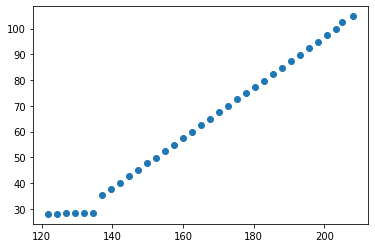

In [8]:
x=data["Height"]
y=data["Weight"]
plt.scatter(x,y)
plt.show()

In [9]:
dataheighttrain=data.Height[0:30]
dataheighttest=data.Height[30:34]

dataweighttrain=data.Weight[0:30]
dataweighttest=data.Weight[30:34]

print(dataheighttest)
print(dataweighttest)

30    198.12
31    200.66
32    203.20
33    205.00
Name: Height, dtype: float64
30     94.8
31     97.5
32     99.8
33    102.5
Name: Weight, dtype: float64


In [10]:
dataheighttrain = np.array(data.Height[0:30]).reshape(-1,1)
dataheighttest = np.array(data.Height[30:34]).reshape(-1,1)
dataweighttrain = np.array(data.Weight[0:30]).reshape(-1,1)
dataweighttest= np.array(data.Weight[30:34]).reshape(-1,1)

dataheighttest,dataweighttest

(array([[198.12],
        [200.66],
        [203.2 ],
        [205.  ]]), array([[ 94.8],
        [ 97.5],
        [ 99.8],
        [102.5]]))

In [11]:
regr = linear_model.LinearRegression()

In [12]:
regr.fit(dataheighttrain,dataweighttrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
dataweightpred = regr.predict(dataheighttest)

In [14]:
print("Predicted: ", dataweightpred)
print("True Labels: ", dataweighttest)

Predicted:  [[ 94.01655172]
 [ 96.42858732]
 [ 98.84062291]
 [100.54993948]]
True Labels:  [[ 94.8]
 [ 97.5]
 [ 99.8]
 [102.5]]


In [15]:
print(regr.predict(np.array([208]).reshape(-1,1)))

print(data.Weight[34])

[[103.39880042]]
104.8


In [16]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# Intercept
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [[0.94962031]]
Intercept: 
 [-94.12222469]


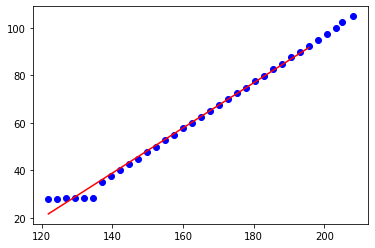

In [17]:
plt.scatter(data.Height, data.Weight,  color='blue')
plt.plot(dataheighttrain, regr.coef_[0][0]*dataheighttrain + regr.intercept_[0], '-r')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
print("Mean squared error (Test Dataset): %.2f" %mean_squared_error(dataweighttest,dataweightpred))

Mean squared error (Test Dataset): 1.62
